# Employment Statistics

In [110]:
import dateutil.parser as dateparse
import pandas as pd
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

### Beveridge curve
Source: ONS LFS unemployment rate (MGSX) and vacancy rate (= AP2Y / (AP2Y+MGRZ))

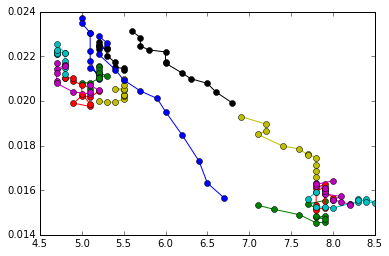

In [144]:
mgrz = pd.read_csv('mgrz.csv', encoding='latin-1', index_col='Date', parse_dates=['Date'])
mgsx = pd.read_csv('mgsx.csv', encoding='latin-1', index_col='Date', parse_dates=['Date'])
ap2y = pd.read_csv('ap2y.csv', encoding='latin-1', index_col='Date', parse_dates=['Date'])

joined = mgrz.join(mgsx).join(ap2y, how='inner').sort_index()
joined['VR'] = joined['AP2Y'] / (joined['AP2Y'] + joined['MGRZ'])

start, end = itertools.tee(pd.date_range(start='20010101', end='20160101', freq='12M'))
next(end, None)

for s, e in zip(start, end):
    window=joined[s:e]
    plt.plot(window['MGSX'].data, window['VR'].data, '-o')